<h1>Shinkansen Travel Experience</h>

In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

The goal of the problem is to predict whether a passenger was satisfied or not considering his/her overall experience of traveling on the Shinkansen Bullet Train.

Dataset: 

The problem consists of 2 separate datasets: Travel data & Survey data. Travel data has information related to passengers and attributes related to the Shinkansen train, in which they traveled. The survey data is aggregated data of surveys indicating the post-service experience. expecting to treat both these datasets as raw data and perform any necessary data cleaning/validation steps as required.

## Analyzing small portion of raw data

In [249]:
survey_df = pd.read_csv("Surveydata_train.csv")
survey_df_test = pd.read_csv("Surveydata_test.csv")
display(survey_df.head())
display(survey_df_test.head())

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Extremely Poor,Ordinary,Good,Poor,Manageable,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Acceptable,Green Car,Excellent,Acceptable,Very Convenient,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Excellent,Ordinary,Extremely Poor,Excellent,Needs Improvement,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent


In [250]:
display(survey_df.info())
display(survey_df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       35602 non-null  int64 
 1   Seat_Comfort             35580 non-null  object
 2   Seat_Class               35602 non-null  object
 3   Arrival_Time_Convenient  32277 non-null  object
 4   Catering                 32245 non-null  object
 5   Platform_Location        35590 non-null  object
 6   Onboard_Wifi_Service     35590 non-null  object
 7   Onboard_Entertainment    35594 non-null  object
 8   Online_Support           35576 non-null  object
 9   Ease_of_Online_Booking   35584 non-null  object
 10  Onboard_Service          32730 non-null  object
 11  Legroom                  35577 non-null  object
 12  Baggage_Handling         35562 non-null  object
 13  CheckIn_Service          35580 non-null  object
 14  Cleanliness              35600 non-nul

None

In [251]:
display(survey_df.iloc[:,2:17].describe(include = 'all'))
display(survey_df_test.iloc[:,1:16].describe(include = 'all'))

,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
count,94318,94379,85449,85638,94349,94349,94361,94288,94306,86778,94289,94237,94302,94373,94373
unique,6,2,6,6,6,6,6,6,6,6,6,5,6,6,6
top,Acceptable,Green Car,Good,Acceptable,Manageable,Good,Good,Good,Good,Good,Good,Good,Good,Good,Good
freq,21158,47435,19574,18468,24173,22835,30446,30016,28909,27265,28870,34944,26502,35427,25533


,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
count,35580,35602,32277,32245,35590,35590,35594,35576,35584,32730,35577,35562,35580,35600,35600
unique,6,2,6,6,5,6,6,5,6,5,6,5,5,5,6
top,Acceptable,Ordinary,Good,Acceptable,Manageable,Good,Good,Good,Good,Good,Good,Good,Good,Good,Good
freq,8003,17860,7361,7133,9364,8743,11436,11487,11025,10222,10842,13291,9982,13421,9680


In [252]:
display(survey_df.isna().sum())
display(survey_df_test.isna().sum())

ID                            0
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64

ID                            0
Seat_Comfort                 22
Seat_Class                    0
Arrival_Time_Convenient    3325
Catering                   3357
Platform_Location            12
Onboard_Wifi_Service         12
Onboard_Entertainment         8
Online_Support               26
Ease_of_Online_Booking       18
Onboard_Service            2872
Legroom                      25
Baggage_Handling             40
CheckIn_Service              22
Cleanliness                   2
Online_Boarding               2
dtype: int64

In [253]:
travel_df = pd.read_csv("Traveldata_train.csv")
display(travel_df.head())
travel_df_test = pd.read_csv("Traveldata_test.csv")
display(travel_df_test.head())

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,99900001,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0
1,99900002,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0
2,99900003,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0
4,99900005,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0


In [254]:
display(travel_df.info())
display(travel_df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35572 non-null  object 
 2   Customer_Type            32219 non-null  object 
 3   Age                      35591 non-null  float64
 4   Type_Travel              32154 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35573 non-null  float64
 8   Arrival_Delay_in_Mins    35479 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.4+ MB


None

In [255]:
display(travel_df.iloc[:,1:9].describe(include ='all'))
display(travel_df_test.iloc[:,1:9].describe(include ='all'))

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
count,94302,85428,94346.000000,85153,94379,94379.000000,94322.000000,94022.000000
unique,2,2,NaN,2,2,NaN,NaN,NaN
top,Female,Loyal Customer,NaN,Business Travel,Eco,NaN,NaN,NaN
freq,47815,69823,NaN,58617,49342,NaN,NaN,NaN
mean,NaN,NaN,39.419647,NaN,NaN,1978.888185,14.647092,15.005222
std,NaN,NaN,15.116632,NaN,NaN,1027.961019,38.138781,38.439409
min,NaN,NaN,7.000000,NaN,NaN,50.000000,0.000000,0.000000
25%,NaN,NaN,27.000000,NaN,NaN,1359.000000,0.000000,0.000000
50%,NaN,NaN,40.000000,NaN,NaN,1923.000000,0.000000,0.000000
75%,NaN,NaN,51.000000,NaN,NaN,2538.000000,12.000000,13.000000


,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
count,35572,32219,35591.000000,32154,35602,35602.000000,35573.000000,35479.000000
unique,2,2,NaN,2,2,NaN,NaN,NaN
top,Female,Loyal Customer,NaN,Business Travel,Eco,NaN,NaN,NaN
freq,18069,26349,NaN,22313,18473,NaN,NaN,NaN
mean,NaN,NaN,39.446995,NaN,NaN,1987.151761,14.880696,15.308802
std,NaN,NaN,15.137554,NaN,NaN,1024.308863,37.895453,38.531293
min,NaN,NaN,7.000000,NaN,NaN,50.000000,0.000000,0.000000
25%,NaN,NaN,27.000000,NaN,NaN,1360.000000,0.000000,0.000000
50%,NaN,NaN,40.000000,NaN,NaN,1929.000000,0.000000,0.000000
75%,NaN,NaN,51.000000,NaN,NaN,2559.000000,13.000000,13.000000


## Display the total number of missing values in each column of the travel_df and travel_df_test dataframes.

In [256]:
display(travel_df.isna().sum())
display(travel_df_test.isna().sum())

ID                            0
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
dtype: int64

ID                            0
Gender                       30
Customer_Type              3383
Age                          11
Type_Travel                3448
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      29
Arrival_Delay_in_Mins       123
dtype: int64

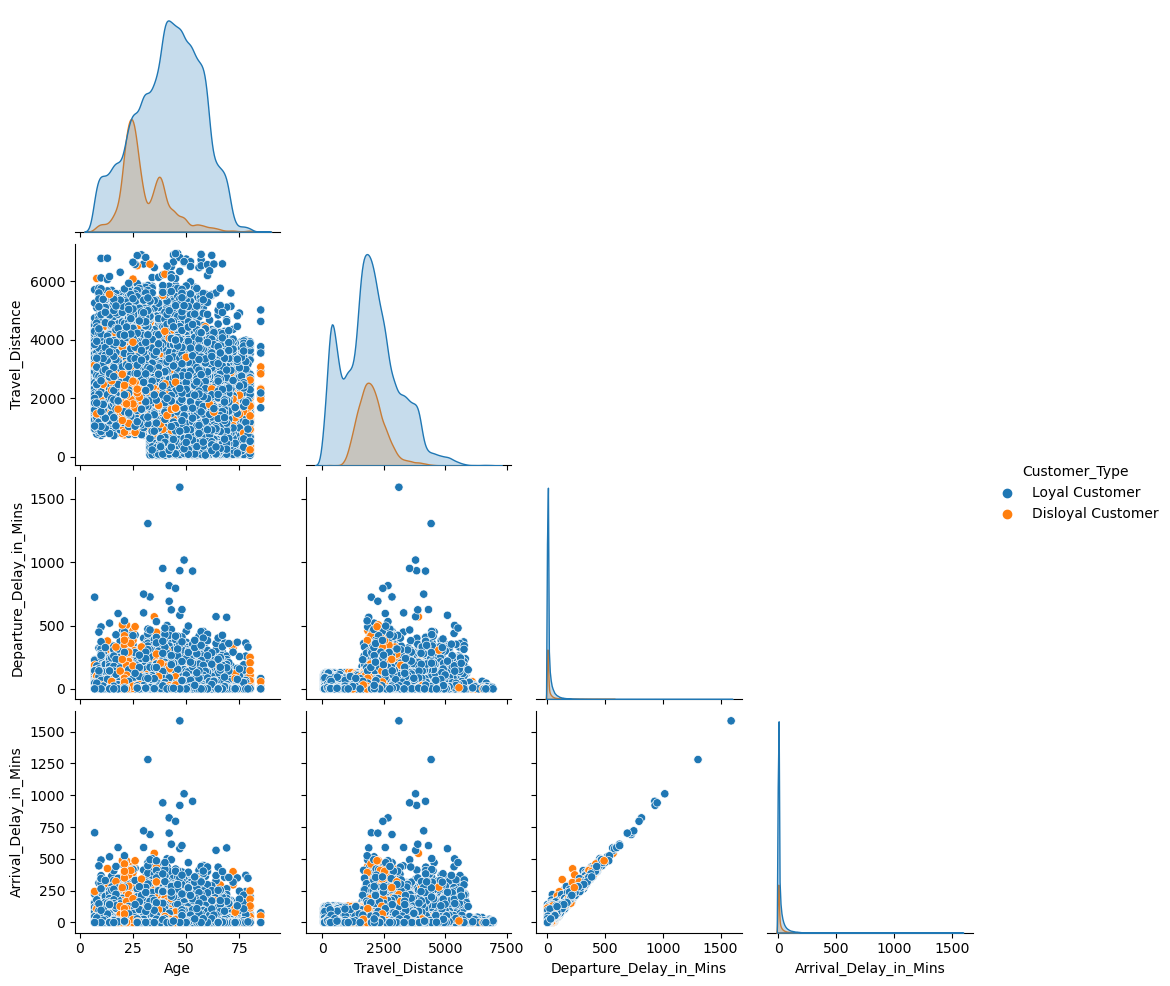

In [217]:
sns.pairplot(travel_df.iloc[:,1:9], corner= True, hue = 'Customer_Type')
plt.show()

In [312]:
merged_df = pd.merge(survey_df, travel_df, on= 'ID')
merged_df_test = pd.merge(survey_df_test, travel_df_test, on= 'ID')

In [258]:
merged_df['Seat_Comfort'].fillna('Acceptable', inplace= True)
display(merged_df['Seat_Comfort'].isna().sum()) #imputing 'acceptable' value for 'NaN'

merged_df_test['Seat_Comfort'].fillna('Acceptable', inplace= True)
display(merged_df_test['Seat_Comfort'].isna().sum()) #imputing 'acceptable' value for 'NaN'

0

0

In [259]:
display(merged_df.groupby('Arrival_Time_Convenient').mean()['Arrival_Delay_in_Mins'])

display(merged_df['Arrival_Time_Convenient'].value_counts())

display(merged_df_test.groupby('Arrival_Time_Convenient').mean()['Arrival_Delay_in_Mins'])

display(merged_df_test['Arrival_Time_Convenient'].value_counts())

Arrival_Time_Convenient
Acceptable           15.283059
Excellent            14.551372
Extremely Poor       12.960593
Good                 15.046130
Needs Improvement    15.595622
Poor                 15.340761
Name: Arrival_Delay_in_Mins, dtype: float64

Good                 19574
Excellent            17684
Acceptable           15177
Needs Improvement    14990
Poor                 13692
Extremely Poor        4332
Name: Arrival_Time_Convenient, dtype: int64

Arrival_Time_Convenient
Acceptable           15.711809
Excellent            15.702209
Extremely Poor       12.568510
Good                 15.440278
Needs Improvement    15.620385
Poor                 14.699961
Name: Arrival_Delay_in_Mins, dtype: float64

Good                 7361
Excellent            6589
Acceptable           5844
Needs Improvement    5684
Poor                 5131
Extremely Poor       1668
Name: Arrival_Time_Convenient, dtype: int64

In [260]:
merged_df['Arrival_Time_Convenient'].fillna('Good', inplace = True)
display(merged_df['Arrival_Time_Convenient'].isna().sum()) #imputing 'good' value for 'NaN'

merged_df_test['Arrival_Time_Convenient'].fillna('Good', inplace = True)
display(merged_df_test['Arrival_Time_Convenient'].isna().sum())

0

0

In [261]:
#imputing all columns from survey and Gender and Frequency from travel in merged_df with highest frequency value
for i in range (5,19):
    merged_df.iloc[:,i].fillna(merged_df.iloc[:,i].value_counts().index[0], inplace = True)    

for i in range (4,18):
    merged_df_test.iloc[:,i].fillna(merged_df_test.iloc[:,i].value_counts().index[0], inplace = True)  

<h4>the following code discretizes the 'Age' feature into five age groups and assigns a label to each group, which will help in creating more meaningful categories for analysis and modeling.</h4>

In [262]:
merged_df['Age'] = pd.cut(merged_df['Age'], 5, labels = ['25', '35', '45', '60', '80'])
merged_df_test['Age'] = pd.cut(merged_df_test['Age'], 5, labels = ['25', '35', '45', '60', '80'])

display("Age:", merged_df.Age.unique())
display("Age:", merged_df_test.Age.unique())

'Age:'

['45', '60', '25', '35', '80', NaN]
Categories (5, object): ['25' < '35' < '45' < '60' < '80']

'Age:'

['35', '25', '60', '45', '80', NaN]
Categories (5, object): ['25' < '35' < '45' < '60' < '80']

In [263]:
np.where(merged_df['Customer_Type'] == 'Loyal Customer', merged_df['Age'], merged_df['Age'].fillna('60', inplace = True))
np.where(merged_df['Customer_Type'] == 'Disloyal Customer', merged_df['Age'], merged_df['Age'].fillna('25', inplace = True))
np.where(merged_df_test['Customer_Type'] == 'Loyal Customer', merged_df_test['Age'], merged_df_test['Age'].fillna('60', inplace = True))
np.where(merged_df_test['Customer_Type'] == 'Disloyal Customer', merged_df_test['Age'], merged_df_test['Age'].fillna('25', inplace = True))

array([None, '25', None, ..., '25', None, None], dtype=object)

In [264]:
merged_df.groupby(['Travel_Class', 'Type_Travel']).count()['ID']

Travel_Class  Type_Travel    
Business      Business Travel    38849
              Personal Travel     1791
Eco           Business Travel    19768
              Personal Travel    24745
Name: ID, dtype: int64

In [265]:
#Check for Nan values
merged_df[merged_df['Type_Travel'].isna()]['Travel_Class']

0        Business
12       Business
15       Business
30            Eco
39            Eco
           ...   
94273         Eco
94288         Eco
94307    Business
94328         Eco
94378         Eco
Name: Travel_Class, Length: 9226, dtype: object

In [266]:
merged_df['Type_Travel'] = np.where(merged_df['Travel_Class'] == 'Business', merged_df['Type_Travel'], 'Business travel')
merged_df['Type_Travel'] = np.where(merged_df['Travel_Class'] == 'Eco', merged_df['Type_Travel'], 'Personal Travel')

merged_df_test['Type_Travel'] = np.where(merged_df_test['Travel_Class'] == 'Business', merged_df_test['Type_Travel'], 'Business travel')
merged_df_test['Type_Travel'] = np.where(merged_df_test['Travel_Class'] == 'Eco', merged_df_test['Type_Travel'], 'Personal Travel')

In [267]:
merged_df['Departure_Delay_in_Mins'].fillna(merged_df['Departure_Delay_in_Mins'].mean(), inplace = True)
merged_df['Arrival_Delay_in_Mins'].fillna(merged_df['Arrival_Delay_in_Mins'].mean(), inplace = True)

merged_df_test['Departure_Delay_in_Mins'].fillna(merged_df_test['Departure_Delay_in_Mins'].mean(), inplace = True)
merged_df_test['Arrival_Delay_in_Mins'].fillna(merged_df_test['Arrival_Delay_in_Mins'].mean(), inplace = True)

In [268]:
display(merged_df.isna().sum())
display(merged_df_test.isna().sum())

ID                         0
Overall_Experience         0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
dtype: int64

ID                         0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
dtype: int64

<h4>The following code replaces the string values of ordinal categories with corresponding numerical values, in order to perform computations and analysis on these categorical variables.</h4>

In [269]:
#Encoded column value replacement for ordinal categories in merged_df

cols_to_replace = ['Seat_Comfort', 'Arrival_Time_Convenient', 'Catering', 'Onboard_Wifi_Service',
                   'Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking',
                   'Onboard_Service','Legroom', 'CheckIn_Service',  'Cleanliness',
                   'Online_Boarding', 'Baggage_Handling']

for col in cols_to_replace:
    merged_df[col].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'],
                           [5, 4, 3, 2, 1, 0], inplace=True)
    merged_df_test[col].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'],
                           [5, 4, 3, 2, 1, 0], inplace=True)


In [270]:
merged_df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       35602 non-null  int64   
 1   Seat_Comfort             35602 non-null  int64   
 2   Seat_Class               35602 non-null  object  
 3   Arrival_Time_Convenient  35602 non-null  int64   
 4   Catering                 35602 non-null  int64   
 5   Platform_Location        35602 non-null  object  
 6   Onboard_Wifi_Service     35602 non-null  int64   
 7   Onboard_Entertainment    35602 non-null  int64   
 8   Online_Support           35602 non-null  int64   
 9   Ease_of_Online_Booking   35602 non-null  int64   
 10  Onboard_Service          35602 non-null  int64   
 11  Legroom                  35602 non-null  int64   
 12  Baggage_Handling         35602 non-null  int64   
 13  CheckIn_Service          35602 non-null  int64   
 14  Cleanl

<h4>applying replacements and mappings to several columns in the merged_df and merged_df_test data frames in order to encode ordinal and categorical variables, respectively.</h4>

In [271]:
# List of columns to be processed
columns = ['Platform_Location', 'Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class']

# Loop through columns and apply replacements in merged_df(_test)
for col in columns:
    merged_df[col].replace(['Very Convenient', 'Needs Improvement', 'Manageable', 'Inconvenient', 'Convenient', 'Very Inconvenient'],
                            [5, 2, 3, 1, 4, 0], inplace=True)
    merged_df_test[col].replace(['Very Convenient', 'Needs Improvement', 'Manageable', 'Inconvenient', 'Convenient', 'Very Inconvenient'],
                                 [5, 2, 3, 1, 4, 0], inplace=True)

# Define mapping for the remaining columns
mapping = {'Gender': {'Female': 0, 'Male': 1},
            'Seat_Class': {'Green Car': 0, 'Ordinary': 1},
           'Customer_Type': {'Loyal Customer': 0, 'Disloyal Customer': 1},
           'Type_Travel': {'Business travel': 0, 'Personal Travel': 1},
           'Travel_Class': {'Business': 0, 'Eco': 1}}

# Loop through columns and apply mappings in merged_df(_test)
for col, mapping_dict in mapping.items():
    merged_df[col].replace(mapping_dict, inplace=True)
    merged_df_test[col].replace(mapping_dict, inplace=True)

In [272]:
for feature in merged_df.columns:
    if merged_df[feature].dtype == 'object':
        merged_df[feature] = pd.Categorical(merged_df[feature])
        
merged_df = pd.get_dummies(merged_df, columns = ['Age'])

for feature in merged_df_test.columns:
    if merged_df_test[feature].dtype == 'object':
        merged_df_test[feature] = pd.Categorical(merged_df_test[feature])
        
merged_df_test = pd.get_dummies(merged_df_test, columns = ['Age'])

In [273]:
display(merged_df.info())
display(merged_df_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Overall_Experience       94379 non-null  int64  
 2   Seat_Comfort             94379 non-null  int64  
 3   Seat_Class               94379 non-null  int64  
 4   Arrival_Time_Convenient  94379 non-null  int64  
 5   Catering                 94379 non-null  int64  
 6   Platform_Location        94379 non-null  int64  
 7   Onboard_Wifi_Service     94379 non-null  int64  
 8   Onboard_Entertainment    94379 non-null  int64  
 9   Online_Support           94379 non-null  int64  
 10  Ease_of_Online_Booking   94379 non-null  int64  
 11  Onboard_Service          94379 non-null  int64  
 12  Legroom                  94379 non-null  int64  
 13  Baggage_Handling         94379 non-null  int64  
 14  CheckIn_Service       

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Seat_Comfort             35602 non-null  int64  
 2   Seat_Class               35602 non-null  int64  
 3   Arrival_Time_Convenient  35602 non-null  int64  
 4   Catering                 35602 non-null  int64  
 5   Platform_Location        35602 non-null  int64  
 6   Onboard_Wifi_Service     35602 non-null  int64  
 7   Onboard_Entertainment    35602 non-null  int64  
 8   Online_Support           35602 non-null  int64  
 9   Ease_of_Online_Booking   35602 non-null  int64  
 10  Onboard_Service          35602 non-null  int64  
 11  Legroom                  35602 non-null  int64  
 12  Baggage_Handling         35602 non-null  int64  
 13  CheckIn_Service          35602 non-null  int64  
 14  Cleanliness           

None

In [274]:
#seperating the independant and dependant variables
x = merged_df.drop(['ID', 'Overall_Experience', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins'], axis = 1)
y = merged_df['Overall_Experience']

x_test = merged_df_test.drop(['ID', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins'], axis = 1)
display(x_test.head())

,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,...,Gender,Customer_Type,Type_Travel,Travel_Class,Travel_Distance,Age_25,Age_35,Age_45,Age_60,Age_80
0,3,0,3,3,3,2,5,4,5,5,...,0,0,1,0,532,0,1,0,0,0
1,0,1,4,1,3,3,1,3,3,5,...,0,1,1,0,1425,1,0,0,0,0
2,5,1,5,5,5,5,5,5,2,2,...,1,0,1,0,2832,0,0,0,1,0
3,3,0,5,3,5,1,3,5,1,3,...,0,0,0,1,1352,0,1,0,0,0
4,5,1,0,5,2,5,5,5,5,4,...,1,1,1,0,1610,1,0,0,0,0


<h4> Performing z-score normalization on the numerical columns of the data frames x and x_test and assigns the normalized values to df_scaled and df_test, respectively, which helps to make the data comparable and suitable for modeling purposes.</h4>

In [275]:
#scaling the data sets with zscores
from scipy.stats import zscore
df_scaled = x.apply(zscore)
display(df_scaled.head())


df_test = x_test.apply(zscore)
display(df_test.head())

,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,...,Gender,Customer_Type,Type_Travel,Travel_Class,Travel_Distance,Age_25,Age_35,Age_45,Age_60,Age_80
0,-0.602903,-0.994811,1.288950,1.549973,1.536013,0.569615,-1.027150,-0.397449,-1.126732,-1.235539,...,-0.985222,-0.445082,1.046703,-1.046703,-1.660469,-0.412272,-0.684704,1.40772,-0.478846,-0.11758
1,-1.321256,1.005216,1.288950,-1.356788,-0.757533,0.569615,-1.770047,0.367298,0.405697,1.213628,...,1.014999,-0.445082,-0.955380,0.955380,0.215099,-0.412272,-0.684704,1.40772,-0.478846,-0.11758
2,-0.602903,-0.994811,-0.735667,-0.630097,-0.757533,-0.946258,0.458644,1.132046,1.171912,1.213628,...,-0.985222,-0.445082,1.046703,-1.046703,-0.892926,-0.412272,-0.684704,1.40772,-0.478846,-0.11758
3,0.115449,1.005216,-0.735667,0.096593,-0.757533,-0.188322,-1.027150,-0.397449,-0.360518,-0.419150,...,-0.985222,-0.445082,1.046703,-1.046703,-1.166284,-0.412272,-0.684704,1.40772,-0.478846,-0.11758
4,0.115449,1.005216,-0.060795,0.096593,0.006983,-0.946258,0.458644,1.132046,0.405697,0.397239,...,-0.985222,-0.445082,1.046703,-1.046703,0.002054,-0.412272,-0.684704,1.40772,-0.478846,-0.11758


,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,...,Gender,Customer_Type,Type_Travel,Travel_Class,Travel_Distance,Age_25,Age_35,Age_45,Age_60,Age_80
0,0.117190,-1.003320,-0.055289,0.098743,0.008010,-0.950595,1.200083,0.367859,1.166951,1.218455,...,-0.983397,-0.444331,1.038491,-1.038491,-1.420638,-0.413432,1.459682,-0.706154,-0.483377,-0.112378
1,-2.036384,0.996691,0.620210,-1.357833,0.008010,-0.191237,-1.773978,-0.400356,-0.365284,1.218455,...,-0.983397,2.250573,1.038491,-1.038491,-0.548819,2.418779,-0.685081,-0.706154,-0.483377,-0.112378
2,1.552905,0.996691,1.295708,1.555318,1.545325,1.327480,1.200083,1.136075,-1.131402,-1.216905,...,1.016883,-0.444331,1.038491,-1.038491,0.824810,-0.413432,-0.685081,-0.706154,2.068779,-0.112378
3,0.117190,-1.003320,1.295708,0.098743,1.545325,-1.709954,-0.286947,1.136075,-1.897520,-0.405118,...,-0.983397,-0.444331,-0.962936,0.962936,-0.620087,-0.413432,1.459682,-0.706154,-0.483377,-0.112378
4,1.552905,0.996691,-2.081785,1.555318,-0.760648,1.327480,1.200083,1.136075,1.166951,0.406669,...,1.016883,2.250573,1.038491,-1.038491,-0.368206,2.418779,-0.685081,-0.706154,-0.483377,-0.112378


In [276]:
#performing train-test split of (80:20) on the training data
X_train, X_test, Y_train, Y_test = train_test_split(df_scaled, y, test_size= 0.20, random_state=13)

display(X_train.shape)
display(X_test.shape)
display(Y_train.shape)
display(Y_test.shape)

(75503, 25)

(18876, 25)

(75503,)

(18876,)

In [280]:
#initial 2 classifiers
rf = RandomForestClassifier(n_estimators=220, max_depth=20, max_features=15, random_state=100)
dTree = DecisionTreeClassifier(random_state=9, max_depth=15)

ada1 = AdaBoostClassifier(base_estimator=rf, n_estimators=22, learning_rate=0.1, random_state=88)
ada2 = AdaBoostClassifier(base_estimator=dTree, n_estimators=20, learning_rate=0.1, random_state=88)
bgg = BaggingClassifier(random_state=5)
bgg1 = BaggingClassifier(base_estimator=dTree, n_estimators=50, random_state=500, max_features=10)
dTree1 = DecisionTreeClassifier(random_state=9, max_depth=15, min_samples_split=75, min_samples_leaf=15)
gb = GaussianNB()
grad = GradientBoostingClassifier(random_state=3000, learning_rate=0.1, n_estimators=100)
lr = LogisticRegression(random_state=100, penalty='l2', tol=0.0001)
lr1 = LogisticRegression(random_state=70, penalty='l1', solver='saga', tol=0.0001)
rf1 = RandomForestClassifier(n_estimators=100, random_state=100)

In [282]:
model = [ada1, ada2, gb, lr, lr1, bgg, bgg1, grad, dTree, dTree1, rf, rf1]

for i in model: #accuracy on train set from training data
    i.fit(X_train , Y_train)
    y_predict = i.predict(X_train)
    display(accuracy_score(Y_train, y_predict))

0.9987152828364436

1.0

0.8149080168999907

0.8307352025747321

0.8307352025747321

0.9962385600572162

0.9637365402699231

0.9148245765068937

0.9657232162960412

0.9365985457531489

0.9943710845926652

1.0

In [283]:
for i in model:  #accuracy on test set from training data
    i.fit(X_train , Y_train)
    y_predict_test = i.predict(X_test)
    display(accuracy_score(Y_test, y_predict_test))

0.9502542911633821

0.9395528713710531

0.8155329518965883

0.8319559228650137

0.8320089001907184

0.9404005085823267

0.9296990887899979

0.9163488027124391

0.9304407713498623

0.9303348166984531

0.9502542911633821

0.948823903369358

In [356]:
df_test1 = merged_df_test.copy()
rf.fit(X_train, Y_train)

prob = rf.predict_proba(df_test)
pred = rf.predict(df_test)

for i in range(0,35602):
    if(prob[i, 1] > 0.55):
        pred[i] = 1 
        
df_test1['Overall_Experience'] = pred
sample = df_test1[['ID', 'Overall_Experience']]
sample.to_csv('sample.csv')

In [351]:
ada1 = AdaBoostClassifier(base_estimator=rf, n_estimators=32, learning_rate=0.1, random_state= 88)
ada1.fit(X_train, Y_train)
prob = ada1.predict_proba(X_test)
y_predict_test = ada1.predict(X_test)

for i in range(0,18876):
    if(prob[i, 1] > 0.60):
        y_predict_test[i] = 1

y_predict = ada1.predict(X_train)
display(accuracy_score(Y_train, y_predict))

y_predict_test = ada1.predict(X_test)
display(accuracy_score(Y_test, y_predict_test))

1.0

0.9507840644204281

## Key findings

The output displays the accuracy scores of 12 different models on the test set. 

1. The highest accuracy score is 0.950, which was achieved by two models: AdaBoost with default parameters (ada1) and AdaBoost with a learning rate of 0.1 (ada2).

2. The lowest accuracy score is 0.815, which was achieved by the Gradient Boosting model (gb).

3. The Logistic Regression model (lr) and Random Forest model with default parameters (rf) both achieved an accuracy score of 0.930.

4. while the other models fell somewhere in between. Overall, the AdaBoost models appear to perform the best on this particular dataset, with an accuracy of 95%

In [ ]:
# create output csv file with predictions for each customer
df_testada = merged_df_test.copy()
pred = ada1.predict(df_test)
df_testada['Overall_Experience'] = pred
sample = df_testada[['ID', 'Overall_Experience']]

sample.to_csv('sample_3.csv')